In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint

import src
from src.reload import deep_reload

In [2]:
'''
Importing California SNG
'''

graph = src.graph.graph_from_json('Outputs/graph_full_red.json')
graph = nx.DiGraph(graph)

In [6]:
places = [k for k, v in graph._node.items() if v['type'] == 'place']
stations = [k for k, v in graph._node.items() if v['type'] == 'station']

graph_places = src.graph.subgraph(graph, places)

node_to_idx = {k: idx for idx, k in enumerate(graph_places.nodes)}
idx_to_node = {idx: k for idx, k in enumerate(graph_places.nodes)}

In [12]:
unweighted = [1 for k, v in graph_places._node.items()]
weighted = [v['population'] for k, v in graph_places._node.items()]
relative = [v['population'] / sum(weighted) for k, v in graph_places._node.items()]

In [22]:
prius_kw = {
    'capacity': 381 * 3.6e6,
    'consumption': 1346,
    'power': 14.15e6,
    'soc_bounds': (.1, 1),
}

golf_kw = {
    'capacity': 445 * 3.6e6,
    'consumption': 1839,
    'power': 14.15e6,
    'soc_bounds': (.1, 1),
}

pacifica_kw = {
    'capacity': 640 * 3.6e6,
    'consumption': 3015,
    'power': 14.15e6,
    'soc_bounds': (.1, 1),
}

station_kw = {
    'place': {
        'cases': 30,
        'type': 'ac',
        'power': np.inf,
        'access': 'private',
        'setup_time': 300,
    },
    'station': {
        'cases': 30,
        'type': 'ac',
        'power': 14.15e6,
        'access': 'private',
        'setup_time': 300,
    },
}

In [37]:
def convert(mpg, mpg_h, range):

    consumption = 1 / (mpg_h * 1.609 / (33.7 * 3600))
    consumption_c = 1 / (mpg * 1.609 / (33.7 * 3600))
    range = range * 1.609
    capacity = consumption_c * range / 3.6e3

    return capacity, consumption, range

In [38]:
convert(132, 125, 272)

(69.44242424242425, 603.2069608452456, 437.648)

In [39]:
convert(120, 109, 259)

(72.73583333333335, 691.7511018867494, 416.731)

In [40]:
convert(137, 134, 419)

(103.06788321167888, 562.6930604899678, 674.171)

In [22]:
bolt_kw = {
    'capacity': 381 * 3.6e6,
    'consumption': 1346,
    'power': 14.15e6,
    'soc_bounds': (.1, 1),
}

model_3_kw = {
    'capacity': 445 * 3.6e6,
    'consumption': 1839,
    'power': 14.15e6,
    'soc_bounds': (.1, 1),
}

air_kw = {
    'capacity': 640 * 3.6e6,
    'consumption': 3015,
    'power': 14.15e6,
    'soc_bounds': (.1, 1),
}

station_kw = {
    'place': {
        'cases': 30,
        'type': 'ac',
        'power': np.inf,
        'access': 'private',
        'setup_time': 300,
    },
    'station': {
        'cases': 30,
        'type': 'ac',
        'power': 14.15e6,
        'access': 'private',
        'setup_time': 300,
    },
}

In [23]:
deep_reload(src)

t0 = time.time()

costs, values, paths = src.experiments.run_case(
    graph,
    prius_kw,
    station_kw,
)

out_arrays_prius = src.analysis.values_to_array(
    places, values, ['total_time', 'driving_time', 'charge_event']
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 25.9931 seconds


In [24]:
deep_reload(src)

t0 = time.time()

costs, values, paths = src.experiments.run_case(
    graph,
    golf_kw,
    station_kw,
)

out_arrays_golf = src.analysis.values_to_array(
    places, values, ['total_time', 'driving_time', 'charge_event']
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 26.1474 seconds


In [25]:
deep_reload(src)

t0 = time.time()

costs, values, paths = src.experiments.run_case(
    graph,
    pacifica_kw,
    station_kw,
)

out_arrays_pacifica = src.analysis.values_to_array(
    places, values, ['total_time', 'driving_time', 'charge_event']
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 26.2872 seconds


In [26]:
src.analysis.gravity_from_array(
    out_arrays_prius['total_time'] / 3600, relative
)[0][0]

1.6008171301971263

In [57]:
deep_reload(src)

src.analysis.gini_from_array(
    out_arrays_prius['total_time'] / 3600, relative
)

0.16317385289352068

In [55]:
a = np.ones((5, 5))
b = np.array([[0, 1, 2, 3, 4]])

a * b

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

In [47]:
src.utilities.gini([0, 0, 1])

0.6666666666666666

In [49]:
src.utilities.gini([.25, .75])

0.25

In [48]:
src.utilities.gini([1, 1, 1])

0.0

In [27]:
src.analysis.gravity_from_array(
    out_arrays_golf['total_time'] / 3600, relative
)[0][0]

1.6008163971817466

In [28]:
src.analysis.gravity_from_array(
    out_arrays_pacifica['total_time'] / 3600, relative
)[0][0]

1.600773007988902

In [29]:
src.analysis.gravity_from_array(
    out_arrays_pacifica['driving_time'] / 3600, relative
)[0][0]

1.6008303868805274

In [42]:
deep_reload(src)

In [18]:
paths['San Diego']['Crescent City']

['San Diego', 'station_753', 'station_1021', 'Crescent City']

In [20]:
values['San Diego']['Crescent City']['total_time'] / 3600

13.702193365010523

In [21]:
values['San Diego']['Crescent City']['driving_time'] / 3600

13.37173358585858

In [19]:
graph['San Diego']['station_753'], graph['station_1021']['Crescent City']

({'time': 8904.843656343657,
  'distance': 238950.0,
  'price': 0,
  'effective_distance': 239790.0,
  'feasible': True,
  'energy': 722966850.0,
  'charging_time': 51.09306360424029,
  'delay_time': 300.0,
  'driving_time': 8904.843656343657,
  'total_time': 9255.936719947897,
  'routing_time': 9255.936719947897,
  'charge_event': 1},
 {'time': 22755.88076923075,
  'distance': 622120.0,
  'price': 0,
  'effective_distance': 622120.0,
  'feasible': True,
  'energy': 1875691800.0,
  'charging_time': 132.55772438162543,
  'delay_time': 300.0,
  'driving_time': 22755.88076923075,
  'total_time': 23188.438493612375,
  'routing_time': 23188.438493612375,
  'charge_event': 1})

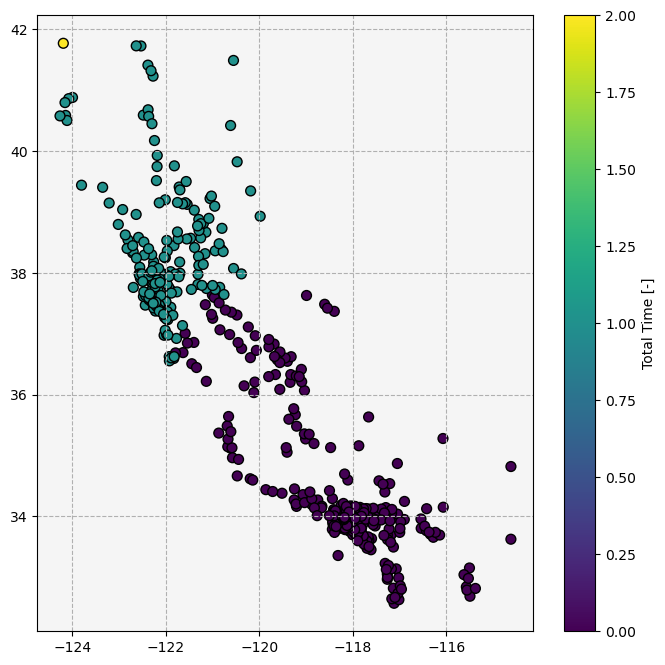

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

origin = 'San Diego'

for source, node in graph_places._node.items():

    arc = values[origin].get(source, {})

    # node['plot'] = (
    #     arc.get('routing_time', np.nan) - arc.get('driving_time', np.nan)
    # )/ 3600

    # node['plot'] = (
    #     arc.get('total_time', np.nan)
    # )/ 3600

    node['plot'] = arc.get('charge_event', np.nan)

kw = {
    'show_links': False,
    'node_field': 'plot',
    'scatter': {
        's': 50,
        'ec': 'k',
        'zorder': 0,
        'label': 'Stations',
    },
    'colorbar': {
        'label': 'Total Time [-]',
    },
}

src.figures.plot_graph(
   graph_places, ax = ax, **kw,
)

kw = {
    'facecolor': 'whitesmoke',
}

ax.set(**kw)

kw = {
    'ls': '--',
}

ax.grid(**kw)